In [1]:

%pprint
import sys
if (osp.join(os.pardir, 'py') not in sys.path): sys.path.insert(1, osp.join(os.pardir, 'py'))

Pretty printing has been turned OFF


In [2]:

from FRVRS import (nu, fu, display)
import os
import pandas as pd

In [3]:

# Get tag-to-salt data frame
if nu.pickle_exists('tag_to_salt_df'):
    tag_to_salt_df = nu.load_object('tag_to_salt_df')
    print(tag_to_salt_df.shape)
    # df = tag_to_salt_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(9987, 11)



# Triage Accuracy

(How many patients did they get right and do they do it in the right order, for example: still or obvious life threat first (Red, Gray, Black), then wavers, then walkers last.)


<img src="http://localhost:8888/files/itm-analysis-reporting/saves/png/salt_mass_casualty_triage.png" />


### Correct Count

In [ ]:

# Get the percentage tag correct counts for each scene for each group
correct_count_df = fu.get_percentage_tag_correct_dataframe(tag_to_salt_df, groupby_column='logger_version')

In [5]:

correct_count_df

logger_version                          session_uuid  scene_id  \
0                1.3  009b848c-ea64-4f22-bd40-711213a3d327            1   
1                1.3  009b848c-ea64-4f22-bd40-711213a3d327            2   
2                1.0  00b2e9d8-c3bb-4d89-92c1-abce5c4a0655            0   
3                1.0  00b2e9d8-c3bb-4d89-92c1-abce5c4a0655            1   
4                1.0  00b2e9d8-c3bb-4d89-92c1-abce5c4a0655            2   
...              ...                                   ...          ...   
1099             1.0  ff97fc56-c803-4aa7-b419-35e0ac17d0b3            1   
1100             1.0  ff97fc56-c803-4aa7-b419-35e0ac17d0b3            2   
1101             1.3  ffecd29f-ebcd-45d2-9bc1-12adf56cfff8            0   
1102             1.3  ffecd29f-ebcd-45d2-9bc1-12adf56cfff8            1   
1103             1.3  ffecd29f-ebcd-45d2-9bc1-12adf56cfff8            2   

      is_scene_aborted   scene_type  correct_count  total_count  \
0                False       Triage              0           10   
1                False       Triage              7           11   
2                False  Orientation              0            3   
3                False       Triage              3           12   
4                False       Triage              9           11   
...                ...          ...            ...          ...   
1099             False       Triage              4           12   
1100             False       Triage             11           11   
1101             False  Orientation              0            4   
1102             False       Triage              3           12   
1103             False       Triage             10           11   

      percentage_tag_correct  
0                   0.000000  
1                  63.636364  
2                   0.000000  
3                  25.000000  
4                  81.818182  
...                      ...  
1099               33.333333  
1100              100.000000  
1101                0.000000  
1102               25.000000  
1103               90.909091  

[1104 rows x 8 columns]

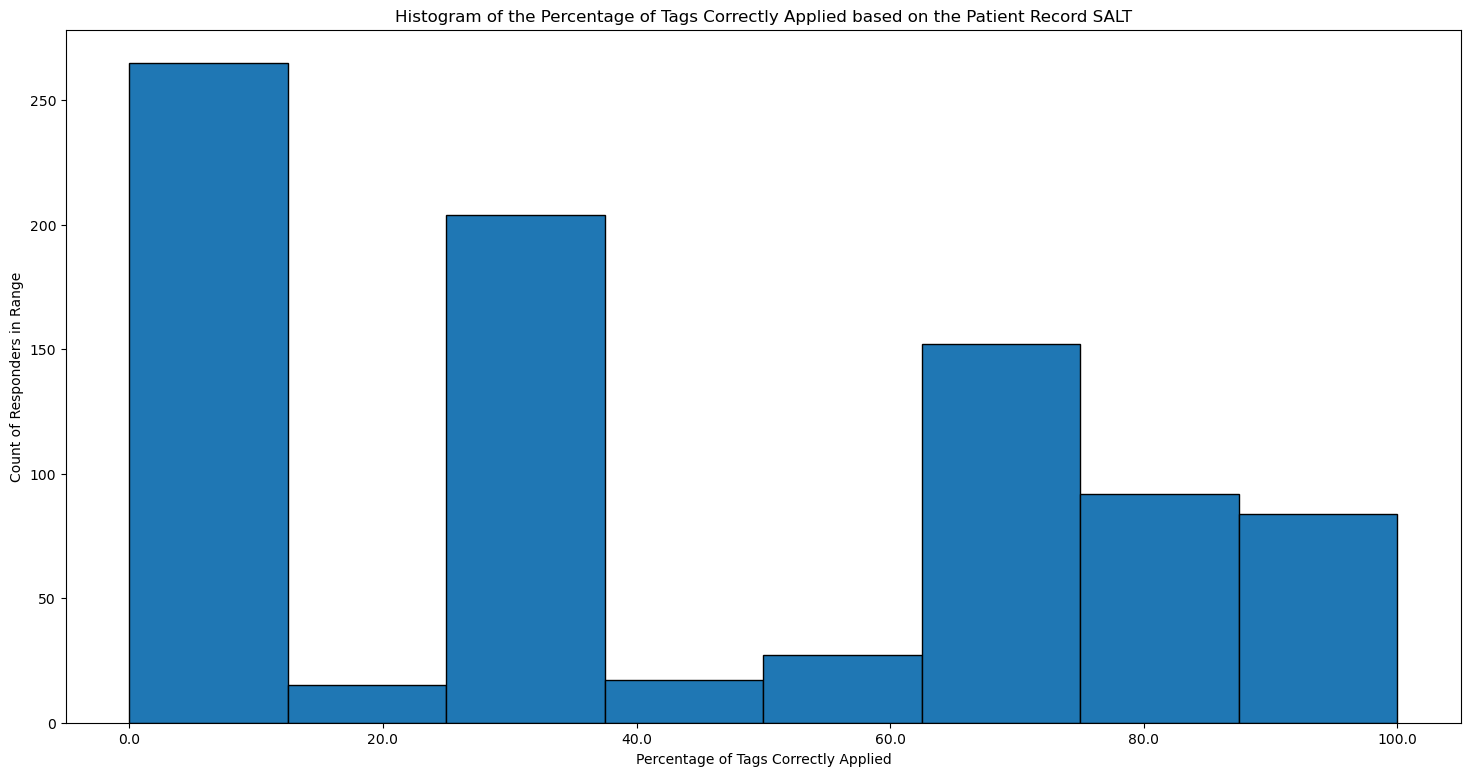

In [6]:

# Display a histogram of the percentage of tags correctly applied based on the patient record SALT
xlabel = 'Percentage of Tags Correctly Applied'
get_xtick_text = lambda text_obj: round(text_obj.get_position()[0], 2)
title = 'Histogram of the Percentage of Tags Correctly Applied based on the Patient Record SALT'
ylabel = 'Count of Responders in Range'
mask_series = (correct_count_df.scene_type == 'Triage') & (correct_count_df.is_scene_aborted == False)
ax = nu.plot_histogram(
    correct_count_df[mask_series], 'percentage_tag_correct', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title, ylabel=ylabel, xticks_are_temporal=False, bins=8
)

In [7]:

# Can you provide the following statistics for this distribution: mean, median, mode, SD, Interquartile range?
columns_list = [
    'correct_count', 'total_count', 'percentage_tag_correct'
]
mask_series = (correct_count_df.scene_type == 'Triage') & (correct_count_df.is_scene_aborted == False)
df = correct_count_df[mask_series][columns_list]
display(nu.get_statistics(df, columns_list).applymap(lambda x: round(x, 2), na_action='ignore').T)

mean  mode  median     SD  min   25%    50%    75%  \
correct_count            4.57   0.0    4.00   3.72  0.0   0.0   4.00   8.00   
total_count             10.70  11.0   11.00   2.10  1.0  10.0  11.00  12.00   
percentage_tag_correct  40.86   0.0   33.33  33.76  0.0   0.0  33.33  72.73   

                          max  
correct_count            13.0  
total_count              26.0  
percentage_tag_correct  100.0


## How many responders correctly tagged all patients? Should be a percentage of all responders

In [8]:

mask_series = (correct_count_df.scene_type == 'Triage') & (correct_count_df.is_scene_aborted == False)
total_count = correct_count_df[mask_series].total_count.sum()
correct_count = correct_count_df[mask_series].correct_count.sum()
percentage_tag_correct = 100*correct_count/total_count
print(f'{percentage_tag_correct:.2f}% of all responders correctly tagged all patients.')

42.73% of all responders correctly tagged all patients.
